<a href="https://colab.research.google.com/github/amirkasaei/Modified-Human-Sperm-Morphology-Analysis/blob/main/MAML_Modified_Human_Sperm_Morphology_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

## **Torch**

In [1]:
!pip install -q torcheval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.4/158.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.9/87.9 kB 4.7 MB/s eta 0:00:00


In [2]:
pip install -q --upgrade torch

In [3]:
pip install -q --upgrade torch torchvision

In [4]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
import torcheval
from torcheval.metrics.functional import binary_accuracy
from torchvision import transforms
import torchvision.transforms as T
from torchvision.transforms import ToTensor, ToPILImage, Normalize, Resize

# PyTorch TensorBoard support
from torch.utils.data import Dataset, DataLoader, Sampler
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime

## **Others**

In [5]:
!pip install --upgrade -q pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.4 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics
from sklearn.model_selection import KFold

import copy
import imageio
import PIL.Image as Image

import os
import sys
import time
import random
from tqdm import trange

from google.colab import drive

In [7]:
# !pip install numba

# from numba import cuda
# device = cuda.get_current_device()
# device.reset()


In [12]:
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/AI Projects/Meta-learning vision project/mhsma-dataset sperm images/mhsma/"

Mounted at /content/drive


## **learn2learn**

In [13]:
!pip install -q git+https://github.com/locuslab/qpth

  Preparing metadata (setup.py) ... done


In [14]:
!pip install -q learn2learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 47.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 62.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 45.5 MB/s eta 0:00:00


In [15]:
import learn2learn as l2l
from learn2learn.data.transforms import (NWays, KShots, LoadData, RemapLabels, ConsecutiveLabels)

# **Preprocessing**

## **Load Data**

In [16]:
!git clone https://github.com/amirkasaei/Modified-Human-Sperm-Morphology-Analysis/
path="/content/Modified-Human-Sperm-Morphology-Analysis/mhsma-dataset/mhsma/"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cloning into 'Modified-Human-Sperm-Morphology-Analysis'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 51 (delta 14), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (51/51), 13.48 MiB | 3.84 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [17]:
size = '128'
x_train = np.load(path + 'x_' + size + '_train.npy').astype('float32')
y_acrosome_train = np.load(path + 'y_acrosome_train.npy').astype('float32')
y_head_train = np.load(path + 'y_head_train.npy').astype('float32')
y_tail_train = np.load(path + 'y_tail_train.npy').astype('float32')
y_vacuole_train = np.load(path + 'y_vacuole_train.npy').astype('float32')

x_valid = np.load(path+'x_' + size + '_valid.npy').astype('float32')
y_acrosome_valid = np.load(path + 'y_acrosome_valid.npy').astype('float32')
y_head_valid = np.load(path + 'y_head_valid.npy').astype('float32')
y_tail_valid = np.load(path + 'y_tail_valid.npy').astype('float32')
y_vacuole_valid = np.load(path + 'y_vacuole_valid.npy').astype('float32')

x_test = np.load(path+'x_' + size + '_test.npy').astype('float32')
y_acrosome_test = np.load(path + 'y_acrosome_test.npy').astype('float32')
y_head_test = np.load(path + 'y_head_test.npy').astype('float32')
y_tail_test = np.load(path + 'y_tail_test.npy').astype('float32')
y_vacuole_test = np.load(path + 'y_vacuole_test.npy').astype('float32')

print('x_train shape:', x_train.shape, '----- y_acrosome_train shape:', y_acrosome_train.shape)
print('x_valid shape:', x_valid.shape, '----- y_acrosome_valid shape:', y_acrosome_valid.shape)
print('x_test shape:', x_test.shape, '----- y_acrosome_test shape:', y_acrosome_test.shape)

x_train shape: (1000, 128, 128) ----- y_acrosome_train shape: (1000,)
x_valid shape: (240, 128, 128) ----- y_acrosome_valid shape: (240,)
x_test shape: (300, 128, 128) ----- y_acrosome_test shape: (300,)


In [18]:
np.count_nonzero(y_head_train == 0)/y_head_train.shape[0]

0.727

In [19]:
np.count_nonzero(y_head_test == 0)/y_head_test.shape[0]

0.73

## **Reshape Data**

In [20]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
# y_acrosome_train = y_acrosome_train.reshape((-1,1))
# y_head_train = y_head_train.reshape((-1,1))
# y_tail_train = y_tail_train.reshape((-1,1))
# y_vacuole_train = y_vacuole_train.reshape((-1,1))

x_valid = x_valid.reshape((x_valid.shape[0], x_valid.shape[1], x_valid.shape[2], 1))
# y_acrosome_valid = y_acrosome_valid.reshape((-1,1))
# y_head_valid = y_head_valid.reshape((-1,1))
# y_tail_valid = y_tail_valid.reshape((-1,1))
# y_vacuole_valid = y_vacuole_valid.reshape((-1,1))

x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
# y_acrosome_test = y_acrosome_test.reshape((-1,1))
# y_head_test = y_head_test.reshape((-1,1))
# y_tail_test = y_tail_test.reshape((-1,1))
# y_vacuole_test = y_vacuole_test.reshape((-1,1))

In [21]:
input_shape = x_train.shape[1:]
input_shape

(128, 128, 1)

## **Torch**

In [22]:
y_acrosome_train_tensor = torch.from_numpy(y_acrosome_train)
y_head_train_tensor = torch.from_numpy(y_head_train)
y_tail_train_tensor = torch.from_numpy(y_tail_train)
y_vacuole_train_tensor = torch.from_numpy(y_vacuole_train)

y_acrosome_valid_tensor = torch.from_numpy(y_acrosome_valid)
y_head_valid_tensor = torch.from_numpy(y_head_valid)
y_tail_valid_tensor = torch.from_numpy(y_tail_valid)
y_vacuole_valid_tensor = torch.from_numpy(y_vacuole_valid)

y_acrosome_test_tensor = torch.from_numpy(y_acrosome_test)
y_head_test_tensor = torch.from_numpy(y_head_test)
y_tail_test_tensor = torch.from_numpy(y_tail_test)
y_vacuole_test_tensor = torch.from_numpy(y_vacuole_test)


In [23]:
Tensor = T.Compose([
    ToTensor()
])

PILimage = T.Compose([
    ToPILImage()
])

Tensor224 = T.Compose([
    ToTensor(),
    Resize(size = (224,224), interpolation=torchvision.transforms.InterpolationMode.NEAREST_EXACT)
])

In [24]:
x_train_tensor = torch.stack([Tensor(img) for img in x_train])

x_valid_tensor = torch.stack([Tensor(img) for img in x_valid])

x_test_tensor = torch.stack([Tensor(img) for img in x_test])

In [25]:
x_train_tensor.shape

torch.Size([1000, 1, 128, 128])

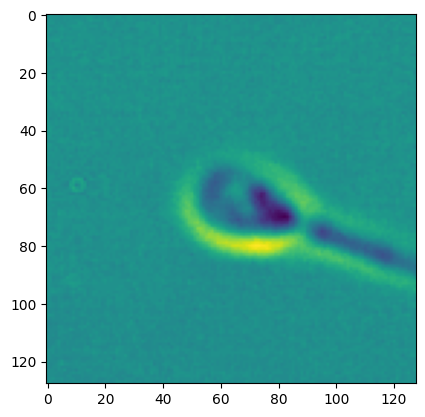

In [26]:
plt.imshow(PILimage(x_train_tensor[0]))

## **Data Normalization**

### **Mean**

In [27]:
mean_train = x_train_tensor.view(1, -1).mean(dim=1)
mean_valid = x_valid_tensor.view(1, -1).mean(dim=1)
mean_test = x_test_tensor.view(1, -1).mean(dim=1)

In [28]:
mean_train, mean_valid, mean_test

(tensor([127.6819]), tensor([128.0480]), tensor([127.8730]))

### **Standard Deviation**

In [29]:
std_train = x_train_tensor.view(1, -1).std(dim=1)
std_valid = x_valid_tensor.view(1, -1).std(dim=1)
std_test = x_test_tensor.view(1, -1).std(dim=1)

In [30]:
std_train, std_valid, std_test

(tensor([8.1010]), tensor([8.4933]), tensor([8.4566]))

### **Normalizarion**

In [31]:
Normalizer = Normalize(128, 8)
x_train_norm = Normalizer(x_train_tensor)

In [32]:
Normalizer = Normalize(mean_valid, std_valid)
x_valid_norm = Normalizer(x_valid_tensor)

In [33]:
Normalizer = Normalize(mean_test, std_test)
x_test_norm = Normalizer(x_test_tensor)

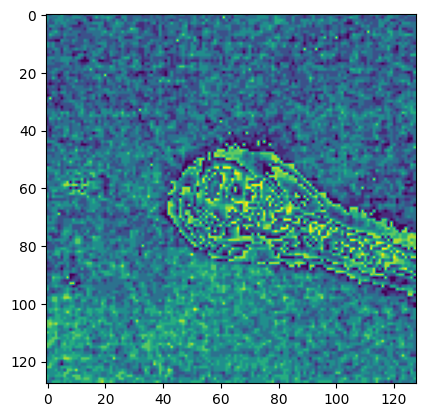

In [34]:
plt.imshow(PILimage(x_train_norm[0]))

## **Data Augmentation**

## **Equal Distribution**

In [35]:
classes, class_samples = np.unique(y_head_train_tensor, return_counts=True)
classes, class_samples

(array([0., 1.], dtype=float32), array([727, 273]))

In [36]:
false_ids = np.random.choice(np.where(y_head_train_tensor == classes[0])[0], size=class_samples[1])
true_ids = np.where(y_head_train_tensor == classes[1])[0]
ids = np.sort(np.concatenate((false_ids, true_ids), axis=0))

In [37]:
x_train_equal = x_train_tensor[ids]
y_head_train_equal = y_head_train_tensor[ids]
x_train_equal.shape, y_head_train_equal.shape

(torch.Size([546, 1, 128, 128]), torch.Size([546]))

In [38]:
y_head_train_equal

tensor([1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
        0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
        0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
        1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
        1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
        1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
        0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
        1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
        0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
        0., 0., 1., 0., 0., 0., 1., 0., 

## **RGB**

In [39]:
x_train_rgb = torch.stack([img.repeat(3, 1, 1) for img in x_train_tensor])
# x_train_rgb = torch.stack([img.repeat(3, 1, 1) for img in x_train_equal])

x_valid_rgb = torch.stack([img.repeat(3, 1, 1) for img in x_valid_tensor])

x_test_rgb = torch.stack([img.repeat(3, 1, 1) for img in x_test_tensor])

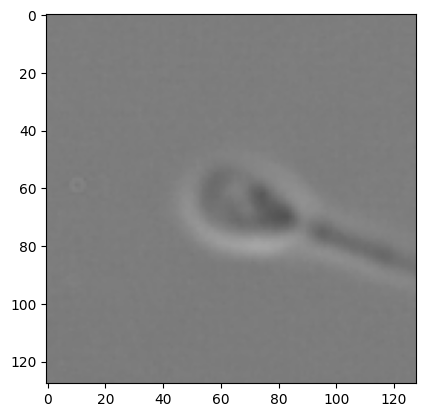

In [40]:
plt.imshow(PILimage(x_train_rgb[0]))

## **Data Loader**

### **Dataset Class**

In [41]:
class MHSMADataset(Dataset):
  def __init__(self, x, y, transform=None, target_transform=None):
    self.img_labels = y
    self.imgs = x
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    return len(self.img_labels)

  def __getitem__(self, idx):
    image = self.imgs[idx]
    label = self.img_labels[idx]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

### **Default Dataloader**

In [42]:
train_data = MHSMADataset(x=x_train_tensor, y=y_head_train_tensor)

valid_data = MHSMADataset(x=x_valid_tensor, y=y_head_valid_tensor)

test_data = MHSMADataset(x=x_test_tensor, y=y_head_test_tensor)

In [43]:
dataset_sizes = {}

dataset_sizes['train'] = len(train_data)
dataset_sizes['valid'] = len(valid_data)
dataset_sizes['test'] = len(test_data)

In [44]:
batch_size=64

train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(valid_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [45]:
dataloaders = {}

dataloaders['train'] = train_dataloader
dataloaders['valid'] = valid_dataloader
dataloaders['test'] = test_dataloader

In [46]:
dataloader_sizes = {}

dataloader_sizes['train'] = len(train_dataloader)
dataloader_sizes['valid'] = len(valid_dataloader)
dataloader_sizes['test'] = len(test_dataloader)

### **RGB Dataloader**

In [47]:
train_data_rgb = MHSMADataset(x=x_train_rgb, y=y_head_train_tensor)
# train_data_rgb = MHSMADataset(x=x_train_rgb, y=y_head_train_equal)

valid_data_rgb = MHSMADataset(x=x_valid_rgb, y=y_head_valid_tensor)

test_data_rgb = MHSMADataset(x=x_test_rgb, y=y_head_test_tensor)

In [48]:
batch_size=64

train_dataloader_rgb = DataLoader(train_data_rgb, batch_size=batch_size, shuffle=True, num_workers=2)
valid_dataloader_rgb = DataLoader(valid_data_rgb, batch_size=batch_size, shuffle=True, num_workers=2)
test_dataloader_rgb = DataLoader(test_data_rgb, batch_size=batch_size, shuffle=True, num_workers=2)

In [49]:
dataloaders_rgb = {}

dataloaders_rgb['train'] = train_dataloader_rgb
dataloaders_rgb['valid'] = valid_dataloader_rgb
dataloaders_rgb['test'] = test_dataloader_rgb

In [50]:
dataloader_rgb_sizes = {}

dataloader_rgb_sizes['train'] = len(train_dataloader_rgb)
dataloader_rgb_sizes['valid'] = len(valid_dataloader_rgb)
dataloader_rgb_sizes['test'] = len(test_dataloader_rgb)

In [51]:
train_batch_num = len(train_dataloader)

In [52]:
# train_features, train_labels = next(iter(train_dataloader))

### **Meta**

In [53]:
train_metadata = l2l.data.MetaDataset(train_data_rgb)

valid_metadata = l2l.data.MetaDataset(valid_data_rgb)

test_metadata = l2l.data.MetaDataset(test_data_rgb)

In [54]:
transforms = [
    l2l.data.transforms.NWays(train_metadata, n=2), # number of output classes
    l2l.data.transforms.KShots(train_metadata, k=2*5), # number of shots per iteration
    l2l.data.transforms.LoadData(train_metadata),
]
tasksets = {}
tasksets['train'] = l2l.data.Taskset(train_metadata, transforms, num_tasks=1)
tasksets['valid'] = l2l.data.Taskset(train_metadata, transforms, num_tasks=1)
tasksets['test'] = l2l.data.Taskset(train_metadata, transforms, num_tasks=1)

In [55]:
# batch_size=32

# train_metaDataloader_rgb = DataLoader(train_metadata, batch_size=batch_size, shuffle=True, num_workers=2)
# valid_metaDataloader_rgb = DataLoader(valid_metadata, batch_size=batch_size, shuffle=True, num_workers=2)
# test_metaDataloader_rgb = DataLoader(test_metadata, batch_size=batch_size, shuffle=True, num_workers=2)

In [56]:
# metaDataloaders_rgb = {}

# metaDataloaders_rgb['train'] = train_metaDataloader_rgb
# metaDataloaders_rgb['valid'] = valid_metaDataloader_rgb
# metaDataloaders_rgb['test'] = test_metaDataloader_rgb

In [57]:
# metaDataloader_rgb_sizes ={}

# metaDataloader_rgb_sizes['train'] = len(train_dataloader_rgb)
# metaDataloader_rgb_sizes['valid'] = len(valid_dataloader_rgb)
# metaDataloader_rgb_sizes['test'] = len(test_dataloader_rgb)

# **Models**

## **Helper Functions**

In [58]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


### **Train**

In [59]:
def train_model(model, criterion, optimizer, scheduler, dataloader, dataloader_size, num_epochs=25):
  since = time.time()

  best_model_wts = copy.deepcopy(model.state_dict())
  best_acc = 0.0

  for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    print('-' * 20)

    # Each epoch has a training and validation phase
    for phase in ['train', 'valid']:
      if phase == 'train':
        model.train()  # Set model to training mode
      else:
        model.eval()   # Set model to evaluate mode

      running_loss = 0.0
      running_corrects = 0
      # running_acc = 0.0

      # Iterate over data.
      for inputs, labels in dataloader[phase]:
        inputs = inputs.to(device)
        labels = labels.type(torch.LongTensor).to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward
        # track history if only in train
        with torch.set_grad_enabled(phase == 'train'):
          outputs = model(inputs)
          _, preds = torch.max(outputs, 1)
          loss = criterion(outputs, labels)
          # acc = binary_accuracy(outputs.reshape(outputs.shape[0]), labels.reshape(labels.shape[0]), threshold=0.5)

          # backward + optimize only if in training phase
          if phase == 'train':
            loss.backward()
            optimizer.step()

        # statistics
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        # running_acc += acc

        # if phase == 'train':
        #   scheduler.step()

      epoch_loss = running_loss / dataset_sizes[phase]
      epoch_acc = running_corrects.double() / dataset_sizes[phase]

      print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

      # deep copy the model
      if phase == 'valid' and epoch_acc > best_acc:
        best_acc = epoch_acc
        best_model_wts = copy.deepcopy(model.state_dict())

    print()

  time_elapsed = time.time() - since
  print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
  print(f'Best val Acc: {best_acc:4f}')

  # load best model weights
  model.load_state_dict(best_model_wts)
  return model

### **Evaluation**

In [60]:
def evaluate_model(model, criterion, dataloader, dataloader_size, dataset_size):
  since = time.time()

  print('-' * 20)

  # Each epoch has a training and validation phase
  model.eval()   # Set model to evaluate mode

  running_loss = 0.0
  running_corrects = 0
  # running_acc = 0.0

  # Iterate over data.
  for inputs, labels in dataloader:
    inputs = inputs.to(device)
    labels = labels.type(torch.LongTensor).to(device)

    # forward
    # track history if only in train
    with torch.set_grad_enabled(False):
      outputs = model(inputs)
      _, preds = torch.max(outputs, 1)
      loss = criterion(outputs, labels)

    # statistics
    running_loss += loss.item() * inputs.size(0)
    running_corrects += torch.sum(preds == labels.data)

  eval_loss = running_loss / dataset_size
  eval_acc = running_corrects.double() / dataset_size

  print(f'test Loss: {eval_loss:.4f} Acc: {eval_acc:.4f}')

## **learn2learn**

### **N-Shot Task Sampler**

In [61]:
class NShotTaskSampler(Sampler):
    def __init__(self,
                 dataset: torch.utils.data.Dataset,
                 episodes_per_epoch: int = None,
                 n: int = None,
                 k: int = None,
                 q: int = None,
                 num_tasks: int = 1):
        """PyTorch Sampler subclass that generates batches of n-shot, k-way,
        q-query tasks.

        Each n-shot task contains a "support set" of `k` sets of `n` samples and
        a "query set" of `k` sets of `q` samples. The support set and the query set
        are all grouped into one Tensor such that the first n * k samples are from
        the support set while the remaining q * k samples are from the query set.

        The support and query sets are sampled such that they are disjoint
        i.e. do not contain overlapping samples.

        # Arguments
            dataset: Instance of torch.utils.data.Dataset from which to draw samples
            episodes_per_epoch: Arbitrary number of batches of n-shot tasks to
                                generate in one epoch
            n_shot: int. Number of samples for each class in the n-shot
                            classification tasks.
            k_way: int. Number of classes in the n-shot classification tasks.
            q_queries: int. Number query samples for each class in the n-shot
                            classification tasks.
            num_tasks: Number of n-shot tasks to group into a single batch
        """
        super(NShotTaskSampler, self).__init__(dataset)
        self.episodes_per_epoch = episodes_per_epoch
        self.dataset = dataset
        if num_tasks < 1:
            raise ValueError('num_tasks must be > 1.')

        self.num_tasks = num_tasks
        # TODO: Raise errors if initialise badly
        self.k = k
        self.n = n
        self.q = q

    def __len__(self):
        return self.episodes_per_epoch

    def __iter__(self):
        for _ in range(self.episodes_per_epoch):
            batch = []

            for task in range(self.num_tasks):
                # Get random classes
                '''episode_classes = np.random.choice(
                    self.dataset.data_frame['disease_id'].unique(), size=self.k,
                                            replace=False)

                df = self.dataset.data_frame[
                        self.dataset.data_frame['disease_id'].isin(episode_classes)]'''
                episode_classes = np.unique(self.dataset.img_labels, return_counts=False)

                #support_k = {k: None for k in episode_classes}
                for k in episode_classes:
                    # Select support examples
                    #support = df[df['disease_id'] == k].sample(self.n)
                    support_ids = np.random.choice(np.where(self.dataset.img_labels == k)[0], size=self.n)
                    #support = self.dataset.imgs[support_ids]
                    #support_k[k] = support

                    for x in support_ids:
                        batch.append(x)

                for k in episode_classes:
                    '''query = df[(df['disease_id'] == k) & (
                        ~df['id'].isin(support_k[k]['id']))].sample(self.q)
                    for i, q in query.iterrows():
                        batch.append(q['id'])'''
                    query=np.setdiff1d(np.where(self.dataset.img_labels == k)[0], support_ids)
                    query = query[np.random.choice(query.shape[0], self.q, replace=False)]
                    for x in query:
                        batch.append(x)

            yield np.stack(batch)


### **Meta Adaption Functions**

In [62]:
def accuracy(predictions, targets):
    predictions = predictions.argmax(dim=1).view(targets.shape)
    return (predictions == targets).sum().float() / targets.size(0)

In [63]:
def fast_adapt(batch, learner, loss, adaptation_steps, shots, ways, device):
    data, labels = batch
    data, labels = data.to(device), labels.type(torch.LongTensor).to(device)

    # Separate data into adaptation/evalutation sets
    adaptation_indices = np.zeros(data.size(0), dtype=bool)
    adaptation_indices[np.arange(shots*ways) * 2] = True
    evaluation_indices = torch.from_numpy(~adaptation_indices)
    adaptation_indices = torch.from_numpy(adaptation_indices)
    adaptation_data, adaptation_labels = data[adaptation_indices], labels[adaptation_indices]
    evaluation_data, evaluation_labels = data[evaluation_indices], labels[evaluation_indices]

    # Adapt the model
    for step in range(adaptation_steps):
        adaptation_error = loss(learner(adaptation_data), adaptation_labels)
        learner.adapt(adaptation_error)

    # Evaluate the adapted model
    predictions = learner(evaluation_data)
    evaluation_error = loss(predictions, evaluation_labels)
    evaluation_accuracy = accuracy(predictions, evaluation_labels)
    return evaluation_error, evaluation_accuracy

In [64]:
def main(ways=2,
          shots=10,
          meta_lr=0.001,#0.003
          fast_lr=0.003,#0.5
          meta_batch_size=32,#32
          adaptation_steps=2,
          num_iterations=100,#60000
          cuda=True,
          seed=42):

    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    device = torch.device('cpu')

    if cuda:
        torch.cuda.manual_seed(seed)
        device = torch.device('cuda')


    best_valid_loss = float('inf')
    best_valid_acc = 0
    for iteration in range(num_iterations):
        opt.zero_grad()
        meta_train_error = 0.0
        meta_train_accuracy = 0.0
        meta_valid_error = 0.0
        meta_valid_accuracy = 0.0
        for train_batch, val_batch in zip(train_taskloader, dev_taskloader): # epoch_len     #range(meta_batch_size):
            # Compute meta-training loss
            learner = maml.clone()
            # batch = tasksets.train.sample()
            evaluation_error, evaluation_accuracy = fast_adapt(train_batch,
                                                                learner,
                                                                loss,
                                                                adaptation_steps,
                                                                shots,
                                                                ways,
                                                                device)

            evaluation_error.backward()
            meta_train_error += evaluation_error.item()
            meta_train_accuracy += evaluation_accuracy.item()

            # Compute meta-validation loss
            learner = maml.clone()

            evaluation_error, evaluation_accuracy = fast_adapt(val_batch,
                                                               learner,
                                                               loss,
                                                               adaptation_steps,
                                                               shots,
                                                               ways,
                                                               device)
            meta_valid_error += evaluation_error.item()
            meta_valid_accuracy += evaluation_accuracy.item()

            # if meta_valid_error < best_valid_loss:
            #   best_valid_loss = meta_valid_error
            #   torch.save(learner, MAML_path)

            if meta_valid_accuracy > best_valid_acc:
              best_valid_acc = meta_valid_accuracy
              torch.save(learner, MAML_path)

        # Print some metrics
        print('\n')
        print('Iteration', iteration+1)
        print('Meta Train Error', meta_train_error / meta_batch_size)
        print('Meta Train Accuracy', meta_train_accuracy / meta_batch_size)
        print('Meta Valid Error', meta_valid_error / meta_batch_size)
        print('Meta Valid Accuracy', meta_valid_accuracy / meta_batch_size)

        # Average the accumulated gradients and optimize
        for p in maml.parameters():
            p.grad.data.mul_(1.0 / meta_batch_size)
        opt.step()

    meta_test_error = 0.0
    meta_test_accuracy = 0.0
    for test_batch in test_taskloader: #range(meta_batch_size):
        # Compute meta-testing loss
        learner = maml.clone()
        # batch = tasksets.test.sample()
        evaluation_error, evaluation_accuracy = fast_adapt(test_batch,
                                                           learner,
                                                           loss,
                                                           adaptation_steps,
                                                           shots,
                                                           ways,
                                                           device)
        meta_test_error += evaluation_error.item()
        meta_test_accuracy += evaluation_accuracy.item()
    print('Meta Test Error', meta_test_error / meta_batch_size)
    print('Meta Test Accuracy', meta_test_accuracy / meta_batch_size)

### **Meta Train**

#### **Task Sampler**

In [65]:
ways=2
shots=10
meta_batch_size=32
num_iterations=100
epoch_len = meta_batch_size

train_taskloader = DataLoader(train_data_rgb, batch_sampler=NShotTaskSampler(train_data_rgb, epoch_len, n=2*shots, k=ways, q=0, num_tasks=1), num_workers=2)

dev_taskloader = DataLoader(valid_data_rgb, batch_sampler=NShotTaskSampler(valid_data_rgb, epoch_len, n=2*shots, k=ways, q=0, num_tasks=1), num_workers=2)

test_taskloader = DataLoader(test_data_rgb, batch_sampler=NShotTaskSampler(test_data_rgb, epoch_len, n=2*shots, k=ways, q=0, num_tasks=1), num_workers=2)


#### **Base Model**

In [66]:
vgg11 = torchvision.models.vgg11_bn(pretrained=True)
num_ftrs = vgg11.classifier[0].in_features
vgg11.classifier = nn.Sequential(
    nn.Linear(num_ftrs, 2048),
    nn.ReLU(),
    nn.Dropout(0.9),
    nn.Linear(2048, 1024),
    nn.Sigmoid(),
    nn.Dropout(0.9),
    nn.Linear(1024, 2)
)
MAML_path = "/content/drive/MyDrive/AI Projects/Meta-learning vision project/MAML_head_vgg11.pt"
vgg11.classifier

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to /root/.cache/torch/hub/checkpoints/vgg11_bn-6002323d.pth
100%|██████████| 507M/507M [00:03<00:00, 162MB/s]


Sequential(
  (0): Linear(in_features=25088, out_features=2048, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.9, inplace=False)
  (3): Linear(in_features=2048, out_features=1024, bias=True)
  (4): Sigmoid()
  (5): Dropout(p=0.9, inplace=False)
  (6): Linear(in_features=1024, out_features=2, bias=True)
)

#### **Train**

In [67]:
meta_lr=1e-3
fast_lr=1e-3
adaptation_steps=5
num_iterations=50
seed=42

# Create model
# model = l2l.vision.models.CNN4(output_size=ways, hidden_size=128, embedding_size=2048)
model = vgg11
model.to(device)
maml = l2l.algorithms.MAML(model, lr=fast_lr, first_order=False)
opt = torch.optim.Adam(maml.parameters(), meta_lr)
loss = nn.CrossEntropyLoss()

In [ ]:
main(ways, shots, meta_lr, fast_lr, meta_batch_size, adaptation_steps, num_iterations)

### **Evaluate**

In [ ]:
evaluate_model(maml, loss, dataloaders_rgb['test'], dataloader_rgb_sizes['test'], dataset_sizes['test'])

In [ ]:
model = torch.load(MAML_path)

In [ ]:
evaluate_model(model, loss, dataloaders_rgb['test'], dataloader_rgb_sizes['test'], dataset_sizes['test'])

### old

In [ ]:
# def meta_train(ways=2, shots=5, meta_lr=1e-3, fast_lr=3e-3, meta_batch_size=32, adaptation_steps=2, num_iterations=10, cuda=True, seed=42):

#     random.seed(seed)
#     np.random.seed(seed)
#     torch.manual_seed(seed)
#     device = torch.device('cpu')
#     if cuda and torch.cuda.device_count():
#         torch.cuda.manual_seed(seed)
#         device = torch.device('cuda')

#     # Create model
#     model = l2l.vision.models.CNN4(output_size=ways, hidden_size=128, embedding_size=8192)
#     model.to(device)
#     maml = l2l.algorithms.MAML(model, lr=fast_lr, first_order=False)
#     opt = torch.optim.Adam(maml.parameters(), meta_lr)
#     loss = nn.CrossEntropyLoss()

#     for iteration in range(num_iterations):
#         opt.zero_grad()
#         meta_train_error = 0.0
#         meta_train_accuracy = 0.0
#         meta_valid_error = 0.0
#         meta_valid_accuracy = 0.0

#         for task in range(meta_batch_size):
#             # Compute meta-training loss
#             learner = maml.clone()
#             batch = tasksets['train'].sample()
#             evaluation_error, evaluation_accuracy = fast_adapt(batch,
#                                                                learner,
#                                                                loss,
#                                                                adaptation_steps,
#                                                                shots,
#                                                                ways,
#                                                                device)
#             evaluation_error.backward()
#             meta_train_error += evaluation_error.item()
#             meta_train_accuracy += evaluation_accuracy.item()

#             # Compute meta-validation loss
#             learner = maml.clone()
#             batch = tasksets['valid'].sample()
#             evaluation_error, evaluation_accuracy = fast_adapt(batch,
#                                                                learner,
#                                                                loss,
#                                                                adaptation_steps,
#                                                                shots,
#                                                                ways,
#                                                                device)
#             meta_valid_error += evaluation_error.item()
#             meta_valid_accuracy += evaluation_accuracy.item()

#         # Print some metrics
#         print('\n')
#         print('Iteration', iteration)
#         print('Meta Train Error', meta_train_error / meta_batch_size)
#         print('Meta Train Accuracy', meta_train_accuracy / meta_batch_size)
#         print('Meta Valid Error', meta_valid_error / meta_batch_size)
#         print('Meta Valid Accuracy', meta_valid_accuracy / meta_batch_size)

#         # Average the accumulated gradients and optimize
#         for p in maml.parameters():
#             p.grad.data.mul_(1.0 / meta_batch_size)
#         opt.step()

#     meta_test_error = 0.0
#     meta_test_accuracy = 0.0
#     for task in range(meta_batch_size):
#         # Compute meta-testing loss
#         learner = maml.clone()
#         batch = tasksets['test'].sample()
#         evaluation_error, evaluation_accuracy = fast_adapt(batch,
#                                                            learner,
#                                                            loss,
#                                                            adaptation_steps,
#                                                            shots,
#                                                            ways,
#                                                            device)
#         meta_test_error += evaluation_error.item()
#         meta_test_accuracy += evaluation_accuracy.item()
#     print('Meta Test Error', meta_test_error / meta_batch_size)
#     print('Meta Test Accuracy', meta_test_accuracy / meta_batch_size)

In [ ]:
# meta_train()

In [ ]:
# num_iterations = 10
# adaptation_steps = 5

# for iteration in range(num_iterations):
#     learner = maml.clone()  # Creates a clone of model
#     adaptation_task = tasksets['train'].sample()
#     # Fast adapt
#     for step in range(adaptation_steps):
#         #error = loss(adaptation_task)
#         a = adaptation_task[0].to(device)
#         b = adaptation_task[1]
#         b = b.type(torch.LongTensor)
#         b = b.to(device)
#         error = loss(learner(a), b)
#         learner.adapt(error)

#     # Compute evaluation
#     evaluation_task = tasksets['valid'].sample()
#     a = evaluation_task[0].to(device)
#     b = evaluation_task[1]
#     b = b.type(torch.LongTensor)
#     b = b.to(device)

#     predictions = learner(a)

#     acc = accuracy(predictions, b)

#     error = loss(predictions, b)

#     # if iteration%100 == 0:
#     print('loss:', error, 'accuracy:', acc)

#     # Meta-update the model parameters
#     opt.zero_grad()
#     error.backward()
#     opt.step()

## **MAML**

In [ ]:
class MAML(object):
    def __init__(self):

        #initialize number of tasks i.e number of tasks we need in each batch of tasks
        self.num_tasks = 10

        #number of samples i.e number of shots  -number of data points (k) we need to have in each task
        self.num_samples = 10

        #number of epochs i.e training iterations
        self.epochs = 100

        #hyperparameter for the inner loop (inner gradient update)
        self.alpha = 0.001

        #hyperparameter for the outer loop (outer gradient update) i.e meta optimization
        self.beta = 0.0001

        #randomly initialize our model parameter theta
        self.theta = np.random.normal(size=50).reshape(50, 1)

    #define our sigmoid activation function
    def sigmoid(self,a):
        return 1.0 / (1 + np.exp(-a))


    #now let us get to the interesting part i.e training :P
    def train(self):

        #for the number of epochs,
        for e in range(self.epochs):

            self.theta_ = []

            #for task i in batch of tasks
            for i in range(self.num_tasks):

                #sample k data points and prepare our train set-------------------------------------------------
                XTrain, YTrain = sample_points(self.num_samples)

                a = np.matmul(XTrain, self.theta)

                YHat = self.sigmoid(a)

                #since we are performing classification, we use cross entropy loss as our loss function
                loss = ((np.matmul(-YTrain.T, np.log(YHat)) - np.matmul((1 -YTrain.T), np.log(1 - YHat)))/self.num_samples)[0][0]

                #minimize the loss by calculating gradients
                gradient = np.matmul(XTrain.T, (YHat - YTrain)) / self.num_samples

                #update the gradients and find the optimal parameter theta' for each of tasks
                self.theta_.append(self.theta - self.alpha*gradient)


            #initialize meta gradients
            meta_gradient = np.zeros(self.theta.shape)

            for i in range(self.num_tasks):

                #sample k data points and prepare our test set for meta training
                XTest, YTest = sample_points(10)

                #predict the value of y
                a = np.matmul(XTest, self.theta_[i])

                YPred = self.sigmoid(a)

                #compute meta gradients
                meta_gradient += np.matmul(XTest.T, (YPred - YTest)) / self.num_samples


            #update our randomly initialized model parameter theta with the meta gradients
            self.theta = self.theta-self.beta*meta_gradient/self.num_tasks

            if e%1000==0:
                print "Epoch {}: Loss {}\n".format(e,loss)
                print 'Updated Model Parameter Theta\n'
                print 'Sampling Next Batch of Tasks \n'
                print '---------------------------------\n'